In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = pd.read_csv("./dados/resultados_conceito_enade_2017.csv",
                  usecols=['Sigla da IES', 'Nota Bruta - FG'])

In [4]:
dfResEnade = pd.DataFrame(data, columns=['Sigla da IES', 'Nota Bruta - FG'])

In [5]:
dfResEnade

,Sigla da IES,Nota Bruta - FG
0,UFMT,"59,4977"
1,UNB,"61,3602"
2,UNB,"58,3155"
3,UFS,"62,2290"
4,UFAM,"60,3600"
...,...,...
10565,FATEC TATUÍ,"47,8159"
10566,FATEC Catanduva,"56,1200"
10567,ISL,"54,2444"
10568,Senac Criciúma,"25,2000"


In [6]:
data = pd.read_csv("./dados/custo_ies_federais_nordeste.csv", 
                      usecols=['Sigla', 'custoAluno'])

In [7]:
dfCusto = pd.DataFrame(data, columns=['Sigla', 'custoAluno'])

In [8]:
dfCusto

,Sigla,custoAluno
0,UFPE,39754.9
1,UFAL,33813.6
2,UFBA,35709.2
3,UFCG,38468.7
4,UFRPE,41387.5
5,UFC,48346.1
6,UFPI,25575.5
7,UFPB,45518.8
8,UFMA,22652.6
9,UFRN,51548.1


In [9]:
dfResEnade.columns = ['sigla', 'nota']

In [10]:
dfCusto.columns = ['sigla', 'custo'] #Custo por aluno

In [11]:
dfResEnade

,sigla,nota
0,UFMT,"59,4977"
1,UNB,"61,3602"
2,UNB,"58,3155"
3,UFS,"62,2290"
4,UFAM,"60,3600"
...,...,...
10565,FATEC TATUÍ,"47,8159"
10566,FATEC Catanduva,"56,1200"
10567,ISL,"54,2444"
10568,Senac Criciúma,"25,2000"


In [12]:
dfCusto

,sigla,custo
0,UFPE,39754.9
1,UFAL,33813.6
2,UFBA,35709.2
3,UFCG,38468.7
4,UFRPE,41387.5
5,UFC,48346.1
6,UFPI,25575.5
7,UFPB,45518.8
8,UFMA,22652.6
9,UFRN,51548.1


In [13]:
siglas = list(dfCusto['sigla'])

In [14]:
siglas

['UFPE',
 'UFAL',
 'UFBA',
 'UFCG',
 'UFRPE',
 'UFC',
 'UFPI',
 'UFPB',
 'UFMA',
 'UFRN',
 'UFS',
 'UFERSA']

In [15]:
dfResEnade = dfResEnade.dropna()

In [16]:
filteredNotas = dfResEnade[dfResEnade['sigla'].isin(siglas)] #Notas filtradas com base nos dados de custo

In [17]:
filteredNotas['nota'] = filteredNotas['nota'].str.replace(',', '.')

/home/anderson/Documents/Projeto-Metodologia-2019.2/mc20192/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
filteredNotas['nota'] = pd.to_numeric(filteredNotas['nota'])

/home/anderson/Documents/Projeto-Metodologia-2019.2/mc20192/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
filteredNotas['nota'].describe()

count    538.000000
mean      54.757544
std        7.701021
min       20.920000
25%       49.901800
50%       55.087850
75%       59.361675
max       92.100000
Name: nota, dtype: float64

In [20]:
dfCusto['custo'].describe()

count       12.000000
mean     35828.358333
std      10205.446684
min      21138.200000
25%      25914.200000
50%      37088.950000
75%      42420.325000
max      51548.100000
Name: custo, dtype: float64

In [21]:
dfCusto = dfCusto.sort_values('sigla')
dfCusto

,sigla,custo
1,UFAL,33813.6
2,UFBA,35709.2
5,UFC,48346.1
3,UFCG,38468.7
11,UFERSA,26027.1
8,UFMA,22652.6
7,UFPB,45518.8
0,UFPE,39754.9
6,UFPI,25575.5
9,UFRN,51548.1


In [22]:
filteredNotas = filteredNotas.sort_values('sigla')
filteredNotas

,sigla,nota
3349,UFAL,56.2776
9439,UFAL,59.5559
1173,UFAL,45.0405
1174,UFAL,45.6492
7628,UFAL,47.2926
...,...,...
2606,UFS,54.5000
2605,UFS,52.5767
2604,UFS,58.0522
5407,UFS,42.5976


In [23]:
notasByCusto = pd.merge(dfCusto, filteredNotas, on='sigla')
notasByCusto = notasByCusto.sort_values('custo')
notasByCusto

,sigla,custo,nota
537,UFS,21138.2,62.2290
507,UFS,21138.2,46.8741
506,UFS,21138.2,35.5500
505,UFS,21138.2,58.4857
504,UFS,21138.2,40.4619
...,...,...,...
420,UFRN,51548.1,62.4000
454,UFRN,51548.1,53.4960
453,UFRN,51548.1,57.8857
451,UFRN,51548.1,47.7805


In [24]:
notasByCusto.describe()

,custo,nota
count,538.000000,538.000000
mean,36806.562825,54.757544
std,9985.125893,7.701021
min,21138.200000,20.920000
25%,26027.100000,49.901800
50%,38468.700000,55.087850
75%,45518.800000,59.361675
max,51548.100000,92.100000


In [25]:
corr = notasByCusto['nota'].corr(notasByCusto['custo'])
corrPearson = notasByCusto['nota'].corr(notasByCusto['custo'], method='pearson')

In [26]:
# O coeficiente de correlação mostra que a nota tem uma correlação despresível com os investimentos no aluno
print(corr)
print(corrPearson)

0.11876340820765549
0.11876340820765549


In [27]:
notasByCusto.corr()

,custo,nota
custo,1.000000,0.118763
nota,0.118763,1.000000


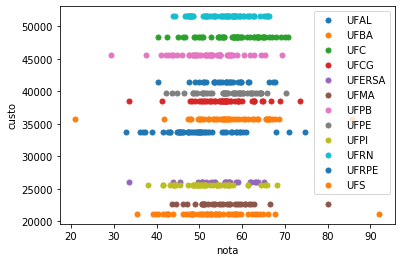

'\nPercebe-se através desse grafico que independente do valor do investimento, as notas estão concentradas\nentre os 40 a 70.\n'

In [57]:
# Grafico custo x nota
arrCusto = notasByCusto['custo'].tolist()
arrNota = notasByCusto['nota'].tolist()

groups = notasByCusto.groupby('sigla')

fig, ax = plt.subplots()
ax.margins(0.05)
for name, group in groups:
    ax.plot(group.nota, group.custo, marker='o', linestyle='', ms=5, label=name)
ax.legend()
plt.xlabel('nota')
plt.ylabel('custo')
plt.savefig('scatterQuest1.png')
plt.show()

#plt.scatter(arrNota, arrCusto)
'''
Percebe-se através desse grafico que independente do valor do investimento, as notas estão concentradas
entre os 40 a 70.
'''



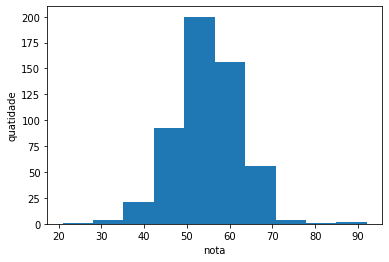

In [55]:
# histograma da frequencia de notas nos dados coletados
plt.hist(notasByCusto['nota'], histtype='bar')
plt.xlabel('nota')
plt.ylabel('quatidade')
plt.savefig('histQuest1.png')

In [42]:
# quatidade de dados coletados de cada instituição
notasByCusto.groupby('sigla').count()['nota']

sigla
UFAL      50
UFBA      46
UFC       51
UFCG      46
UFERSA    25
UFMA      31
UFPB      51
UFPE      49
UFPI      46
UFRN      60
UFRPE     29
UFS       54
Name: nota, dtype: int64